In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_list = {'barcode13.02.bracken.microb.ncbi.txt', 'barcode14.02.bracken.microb.ncbi.txt', 'barcode15.02.bracken.microb.ncbi.txt', 'barcode16.02.bracken.microb.ncbi.txt'}
abundance_dict = {}

for file in file_list:
    barcode = pd.read_csv(file, sep='\t')
    barcode_name = file.split('.')[0]
    abundance_dict[barcode_name] = barcode.set_index('name')['fraction_total_reads']

abundance_matrix = pd.DataFrame(abundance_dict).fillna(0)
print(abundance_matrix)

                                barcode16  barcode14  barcode13  barcode15
name                                                                      
s__2-12-FULL-68-20 sp001770655    0.00000    0.00000    0.00710    0.00000
s__AV55 sp003219335               0.00000    0.00000    0.00031    0.00000
s__AV55 sp003219435               0.00000    0.00000    0.00044    0.00000
s__Acinetobacter sp004336635      0.00000    0.00000    0.00305    0.00000
s__Actinomadura_B rubrobrunea     0.00000    0.00610    0.00178    0.01466
...                                   ...        ...        ...        ...
s__VBAS01 sp005882315             0.00000    0.00177    0.00000    0.00000
s__Variovorax sp001424835         0.00000    0.00100    0.00131    0.00000
s__Williamsia faeni               0.00000    0.01482    0.02030    0.00000
s__ZC4RG25 sp002919265            0.02326    0.02649    0.00417    0.00862
s__ZC4RG25 sp003242645            0.06478    0.10282    0.00928    0.04569

[203 rows x 4 columns]


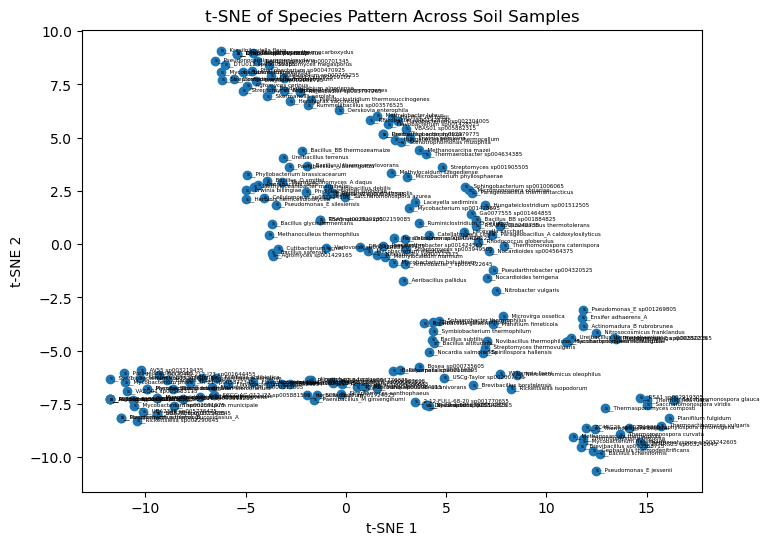

In [4]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(abundance_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])

for i, label in enumerate(abundance_matrix.index):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], label, fontsize=4)

plt.title("t-SNE of Species Pattern Across Soil Samples")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.savefig("t-SNE_Species_Pattern.png", dpi=300, bbox_inches='tight')
plt.show()

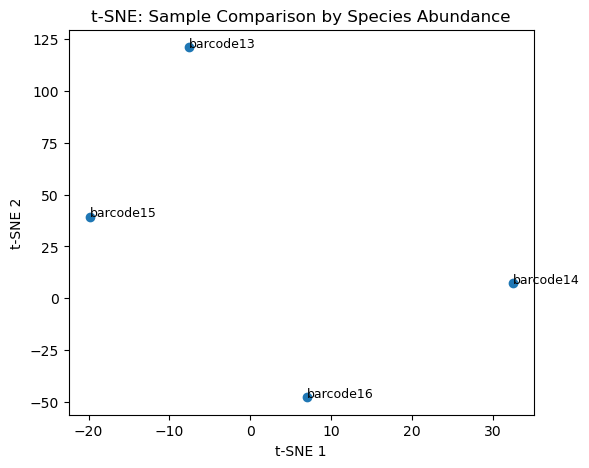

In [6]:
abundance_matrix_sample = pd.DataFrame(abundance_dict).fillna(0).T

tsne_2 = TSNE(n_components=2, perplexity=2, random_state=42)
tsne_results_2 = tsne_2.fit_transform(abundance_matrix_sample)

plt.figure(figsize=(6, 5))
plt.scatter(tsne_results_2[:, 0], tsne_results_2[:, 1])

for i, label in enumerate(abundance_matrix_sample.index):
    plt.text(tsne_results_2[i, 0], tsne_results_2[i, 1], label, fontsize=9)

plt.title("t-SNE: Sample Comparison by Species Abundance")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.savefig("t-SNE_Sample_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()